In [3]:
from imblearn.ensemble import BalancedRandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
position_player_df = pd.read_csv('Data/position_players_complete.csv')
position_player_df.head()

,playerID,nameFirst,nameLast,Seasons,Hits,RBIs,Runs,Stolen_Bases,Strike_Outs,Home_Runs,...,bats,throws,finalGame,yearid,inducted,Total_Games,Games_Started,primary_position,years_since_final_game,eligible_for_hall
0,aaronha01,Hank,Aaron,23,3771,2297,2174,240,1383,755,...,R,R,10/3/76,1982,Y,3298,3173,Out_Field,43.136986,eligible
1,aaronto01,Tommie,Aaron,7,216,94,102,9,145,13,...,R,R,9/26/71,0,N,437,206,First_Base,48.161644,not_eligible
2,abadan01,Andy,Abad,3,2,0,1,0,5,0,...,L,L,4/13/06,0,N,15,4,First_Base,13.591781,not_eligible
3,abadijo01,John,Abadie,2,11,5,4,1,3,0,...,R,R,1875-06-10,0,N,12,0,First_Base,144.520548,not_eligible
4,abbated01,Ed,Abbaticchio,10,772,324,355,142,283,11,...,R,R,9/15/10,0,N,857,357,Second_Base,109.232877,eligible


In [5]:
position_player_df[position_player_df['eligible_for_hall']=='eligible'].inducted.value_counts()

N    2066
Y     158
Name: inducted, dtype: int64

In [6]:
position_player_df.columns

Index(['playerID', 'nameFirst', 'nameLast', 'Seasons', 'Hits', 'RBIs', 'Runs',
       'Stolen_Bases', 'Strike_Outs', 'Home_Runs', 'Walks', 'Games', 'Triples',
       'Doubles', 'Caught_Stealing', 'At_Bats', 'Intentional_Walks',
       'Hit_By_Pitch', 'Sacrifice_Hits', 'Sacrifice_Flies',
       'Ground_Into_Double_Plays', 'weight', 'height', 'bats', 'throws',
       'finalGame', 'yearid', 'inducted', 'Total_Games', 'Games_Started',
       'primary_position', 'years_since_final_game', 'eligible_for_hall'],
      dtype='object')

Machine Learning Model - Balanced Random Forest Classifier

In [7]:
data = position_player_df.drop(['inducted', 'playerID', 'nameFirst', 'nameLast', 'finalGame','bats', 
                                'throws','weight', 'height','yearid','primary_position','years_since_final_game', 
                                'eligible_for_hall'], axis=1)
data.fillna(0, inplace=True)
data.shape

(10248, 20)

In [8]:
target = position_player_df['inducted']
target = target.replace(to_replace='0', 
                 value ="N") 
target.value_counts()

N    10088
Y      160
Name: inducted, dtype: int64

In [9]:
feature_names = data.columns
feature_names

Index(['Seasons', 'Hits', 'RBIs', 'Runs', 'Stolen_Bases', 'Strike_Outs',
       'Home_Runs', 'Walks', 'Games', 'Triples', 'Doubles', 'Caught_Stealing',
       'At_Bats', 'Intentional_Walks', 'Hit_By_Pitch', 'Sacrifice_Hits',
       'Sacrifice_Flies', 'Ground_Into_Double_Plays', 'Total_Games',
       'Games_Started'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/Users/chris.marchetti/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/chris.marchetti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/Users/chris.marchetti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


In [11]:
clf = BalancedRandomForestClassifier(random_state=0)
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.9301327088212334

In [12]:
clf.score(X_train_scaled, y_train)

0.9434035909445746

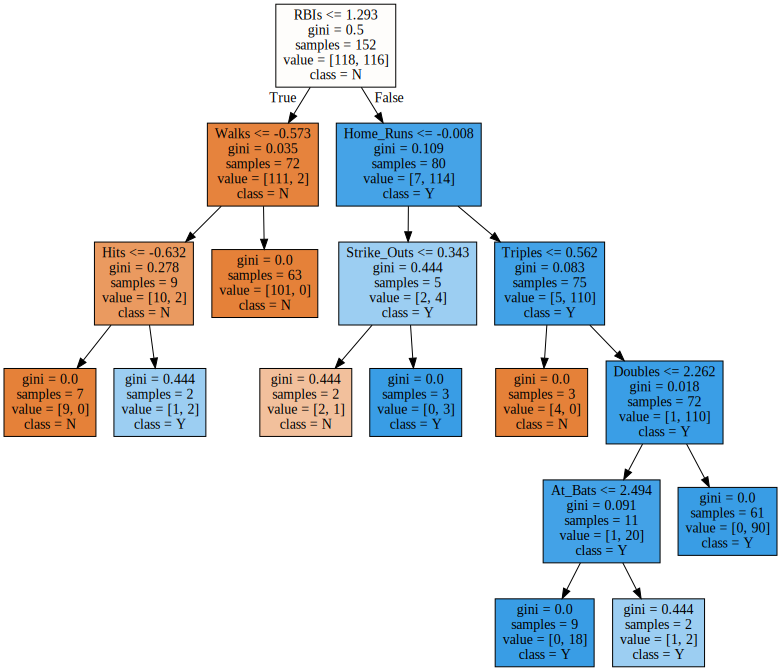

In [13]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf.estimators_[0], 
                                feature_names = feature_names, 
                                class_names=['N', 'Y'] , #y_train.columns,
                                filled = True
#,
#                                 proportion = True,
#                                 leaves_parallel=True
                               )
graph = graphviz.Source(dot_data)
graph

[[2341  178]
 [   1   42]]
Y    42
N     1
Name: predicted, dtype: int64
score for yesses, 0.9767441860465116
The score is the fraction of yesses, you predicted 0.9767441860465116
              precision    recall  f1-score   support

           N       1.00      0.93      0.96      2519
           Y       0.19      0.98      0.32        43

   micro avg       0.93      0.93      0.93      2562
   macro avg       0.60      0.95      0.64      2562
weighted avg       0.99      0.93      0.95      2562



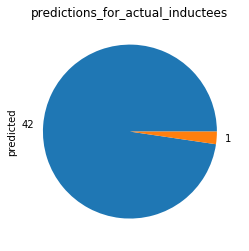

In [14]:
y_predicted = clf.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predicted))

predictions_df = pd.concat([pd.DataFrame(X_test_scaled),
#                            .copy().assign(
                           pd.DataFrame(dict(
    predicted= y_predicted,
    actual=y_test
)).reset_index(drop=True)
                           ], axis=1)
# pd.Series(y_test).value_counts()#[:20]
actual_inductees = predictions_df.loc[predictions_df.actual=='Y']
predictions_for_actual_inductees = actual_inductees.predicted.value_counts()
print(predictions_for_actual_inductees)
predictions_for_actual_inductees.plot(kind='pie', title='predictions_for_actual_inductees',  labels=predictions_for_actual_inductees.values)

print(f"score for yesses, {clf.score(actual_inductees.drop(['predicted', 'actual'],axis=1),actual_inductees .actual)}")
print('The score is the fraction of yesses, you predicted',  42/(1+42))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

In [15]:
print(clf.feature_importances_)

[0.03032381 0.17742865 0.12438682 0.11137164 0.01167691 0.00550712
 0.0100642  0.04945134 0.10351793 0.07384057 0.11882455 0.0032838
 0.0966456  0.00414315 0.00293524 0.00594515 0.00404553 0.00353633
 0.05780086 0.0052708 ]


In [16]:
feature_names

Index(['Seasons', 'Hits', 'RBIs', 'Runs', 'Stolen_Bases', 'Strike_Outs',
       'Home_Runs', 'Walks', 'Games', 'Triples', 'Doubles', 'Caught_Stealing',
       'At_Bats', 'Intentional_Walks', 'Hit_By_Pitch', 'Sacrifice_Hits',
       'Sacrifice_Flies', 'Ground_Into_Double_Plays', 'Total_Games',
       'Games_Started'],
      dtype='object')

Machine Learning Model - xgboost

In [17]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [18]:
# fit model no training data
model = XGBClassifier(scale_pos_weight=1)
model.fit(X_train_scaled, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


In [19]:
y_pred = model.predict(X_test_scaled)
len(y_pred)

2562

In [20]:
model.score(X_train_scaled, y_train)

0.997527972937809

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.59%


[[2500   19]
 [  17   26]]
Y    26
N    17
Name: predicted, dtype: int64
The score is the fraction of yesses, you predicted 0.5813953488372093
              precision    recall  f1-score   support

           N       0.99      0.99      0.99      2519
           Y       0.58      0.60      0.59        43

   micro avg       0.99      0.99      0.99      2562
   macro avg       0.79      0.80      0.79      2562
weighted avg       0.99      0.99      0.99      2562



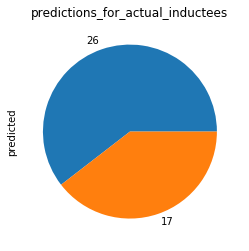

In [22]:

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
predictions_df = pd.concat([pd.DataFrame(X_test_scaled),
#                            .copy().assign(
                           pd.DataFrame(dict(
    predicted= y_pred,
    actual=y_test
)).reset_index(drop=True)
                           ], axis=1)
# pd.Series(y_test).value_counts()#[:20]
actual_inductees = predictions_df.loc[predictions_df.actual=='Y']
predictions_for_actual_inductees = actual_inductees.predicted.value_counts()
print(predictions_for_actual_inductees)
predictions_for_actual_inductees.plot(kind='pie', title='predictions_for_actual_inductees',  labels=predictions_for_actual_inductees.values)

# print(f"score for yesses, {model.score(actual_inductees.drop(['predicted', 'actual'],axis=1),actual_inductees .actual)}")
print('The score is the fraction of yesses, you predicted',  25/(18+25))
print(classification_report(y_test, y_pred))

In [23]:
print(model.feature_importances_)

[0.01627176 0.1865134  0.14543843 0.18748589 0.03108197 0.03787776
 0.03071428 0.02408629 0.02912375 0.05711363 0.01873825 0.01953726
 0.04044038 0.00153801 0.02320046 0.03130458 0.04913309 0.02147188
 0.01379363 0.03513525]


In [24]:
print(feature_names)

Index(['Seasons', 'Hits', 'RBIs', 'Runs', 'Stolen_Bases', 'Strike_Outs',
       'Home_Runs', 'Walks', 'Games', 'Triples', 'Doubles', 'Caught_Stealing',
       'At_Bats', 'Intentional_Walks', 'Hit_By_Pitch', 'Sacrifice_Hits',
       'Sacrifice_Flies', 'Ground_Into_Double_Plays', 'Total_Games',
       'Games_Started'],
      dtype='object')


Text(0, 0.5, 'Features')

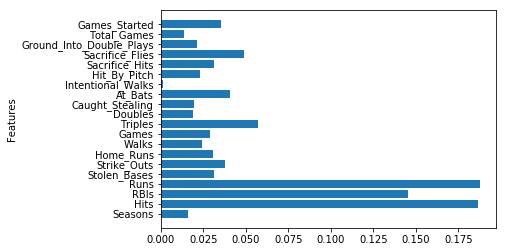

In [25]:
plt.barh(feature_names, model.feature_importances_)
plt.ylabel('Features')


In [26]:
# Preprocessing the entire position player data set for use on the website
# Run all of the data through the xgboost model

data_total = position_player_df.drop(['inducted', 'playerID', 'nameFirst', 'nameLast', 'finalGame','bats', 
                                'throws','weight', 'height','yearid','primary_position','years_since_final_game', 
                                'eligible_for_hall'], axis=1)
data_total.fillna(0, inplace=True)
data_total_scaler = StandardScaler().fit(data_total)
data_total_scaled = data_total_scaler.transform(data_total)
data_total_predicted = model.predict(data_total_scaled)

/Users/chris.marchetti/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/chris.marchetti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [27]:
# add column to original data frame for model's prediction and further cleanup
position_player_predicted = pd.concat([position_player_df, pd.Series(data_total_predicted)], axis=1)
position_player_predicted.rename(columns={0:"model_predict"}, inplace=True)
position_player_predicted['Comparison']=position_player_predicted['inducted']==position_player_predicted['model_predict']
position_player_predicted['yearid'] = position_player_predicted['yearid'].astype('int').replace(0.0, 'N/A')
position_player_predicted.head()

,playerID,nameFirst,nameLast,Seasons,Hits,RBIs,Runs,Stolen_Bases,Strike_Outs,Home_Runs,...,finalGame,yearid,inducted,Total_Games,Games_Started,primary_position,years_since_final_game,eligible_for_hall,model_predict,Comparison
0,aaronha01,Hank,Aaron,23,3771,2297,2174,240,1383,755,...,10/3/76,1982,Y,3298,3173,Out_Field,43.136986,eligible,Y,True
1,aaronto01,Tommie,Aaron,7,216,94,102,9,145,13,...,9/26/71,N/A,N,437,206,First_Base,48.161644,not_eligible,N,True
2,abadan01,Andy,Abad,3,2,0,1,0,5,0,...,4/13/06,N/A,N,15,4,First_Base,13.591781,not_eligible,N,True
3,abadijo01,John,Abadie,2,11,5,4,1,3,0,...,1875-06-10,N/A,N,12,0,First_Base,144.520548,not_eligible,N,True
4,abbated01,Ed,Abbaticchio,10,772,324,355,142,283,11,...,9/15/10,N/A,N,857,357,Second_Base,109.232877,eligible,N,True


In [28]:
# Write out the complete Position Player dataset to csv
position_player_predicted.to_csv('Data/position_players_predicted.csv', index=False)